# Car Price Prediction Using Regression

## Introduction

This notebook demonstrates a complete machine learning regression project for predicting car prices (MSRP - Manufacturer's Suggested Retail Price). We'll walk through the entire data science pipeline from data loading and cleaning to model training and evaluation.

### What is Regression?
Regression is a supervised learning technique used to predict **continuous numerical values**. Unlike classification which predicts categories, regression predicts quantities - in our case, the price of a car in dollars.

### Project Overview
- **Dataset**: Car specifications and prices from various manufacturers
- **Target Variable**: MSRP (price) - continuous numerical value
- **Features**: Car make, model, year, engine specifications, fuel efficiency, etc.
- **Goal**: Build a model that can accurately predict car prices based on their characteristics

### Key Learning Objectives
1. **Data Preprocessing**: Clean and standardize data for machine learning
2. **Exploratory Data Analysis**: Understand data distributions and relationships
3. **Feature Engineering**: Transform data to improve model performance
4. **Model Training**: Implement linear regression algorithms
5. **Model Evaluation**: Assess prediction accuracy using appropriate metrics
6. **Validation Framework**: Properly split data to avoid overfitting

### Why This Matters
Car price prediction has real-world applications in:
- **Used car marketplaces** (determining fair market value)
- **Insurance companies** (calculating vehicle worth)
- **Dealerships** (pricing strategies)
- **Consumers** (making informed purchasing decisions)

In [109]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Loading the Data

In [110]:
# Load the car price dataset from GitHub repository
#df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv')
df = pd.read_csv('data.csv')

# Display the first 5 rows to examine the structure of the data
df.head()   

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


## Data Cleaning

In [111]:
# Standardize column names to follow Python naming conventions
# Convert to lowercase and replace spaces with underscores for easier access

df.columns = df.columns.str.lower().str.replace(' ', '_')

In [112]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [113]:
# Identify columns with string/object data types that need standardization
# These columns likely contain categorical data with inconsistent formatting
df.dtypes[df.dtypes == 'object']

make                 object
model                object
engine_fuel_type     object
transmission_type    object
driven_wheels        object
market_category      object
vehicle_size         object
vehicle_style        object
dtype: object

In [114]:
# Extract the column names that contain string/object data
# Convert to list for easier iteration over string columns

strings = list(df.dtypes[df.dtypes == 'object'].index)
strings

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [115]:
# Clean string values in categorical columns
# Convert to lowercase and replace spaces with underscores for consistency

for col in strings:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [116]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


In [117]:
# Check the data types of all columns after cleaning
# Verify that categorical columns are still objects and numerical columns are numeric

df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

## Exploratory Data Analysis

In [118]:
# Display the entire dataset to get an overview
df

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,46120
11910,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,56670
11911,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50620
11912,acura,zdx,2013,premium_unleaded_(recommended),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50920


In [119]:
# Explore each column to understand the data distribution
# For each column, show: unique values (first 5), total unique count

for col in df.columns:
    print(col)
    print(df[col].unique()[:5])  # Show first 5 unique values
    print(df[col].nunique())     # Count of unique values
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

#### Distribirion of Price

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='msrp', ylabel='Count'>

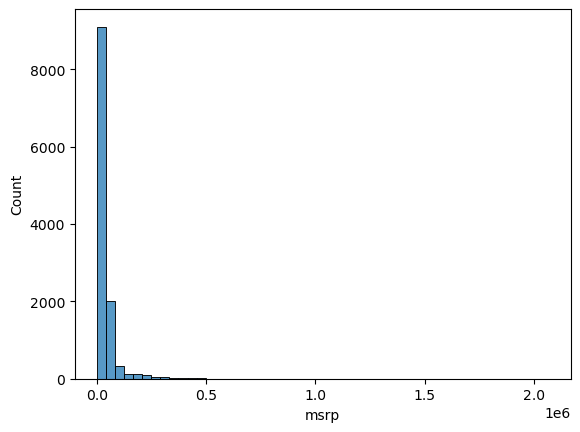

In [120]:
# Visualize the distribution of car prices (MSRP)
# Use histogram with 50 bins to see the price distribution pattern

sns.histplot(df.msrp, bins=50)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='msrp', ylabel='Count'>

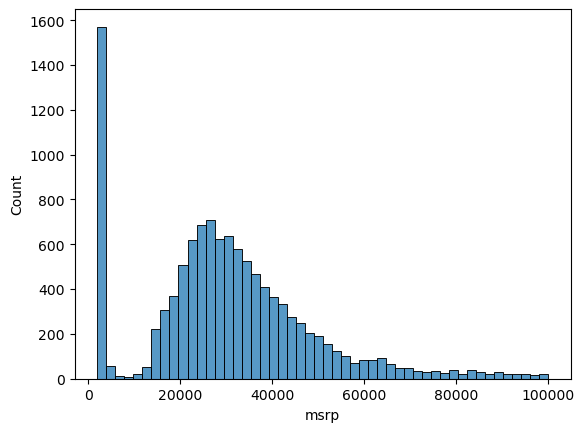

In [121]:
# Focus on cars under $100,000 to see the main distribution
# Remove outliers (expensive luxury cars) to better understand typical price range

sns.histplot(df.msrp[df.msrp < 100000], bins=50)

In [122]:
# Demonstrate logarithmic transformation on sample values
# log(x+1) is used to handle zero values and reduce skewness

np.log([0 + 1, 1+1, 10 + 1, 1000 + 1, 100000 + 1])

array([ 0.        ,  0.69314718,  2.39789527,  6.90875478, 11.51293546])

In [123]:
# Use np.log1p() which is equivalent to log(1+x) but more numerically stable
# This function handles edge cases better than manual log(x+1)

np.log1p([0 + 1, 1+1, 10 + 1, 1000 + 1, 100000 + 1])

array([ 0.69314718,  1.09861229,  2.48490665,  6.90975328, 11.51294546])

In [124]:
# Apply log transformation to price data to reduce skewness
# Log transformation helps normalize the heavily right-skewed price distribution

price_logs = np.log1p(df.msrp)

In [125]:
# Display the log-transformed price values
# These values should be more normally distributed than the original prices

price_logs

0        10.739349
1        10.612779
2        10.500977
3        10.290483
4        10.448744
           ...    
11909    10.739024
11910    10.945018
11911    10.832122
11912    10.838031
11913    10.274913
Name: msrp, Length: 11914, dtype: float64

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='msrp', ylabel='Count'>

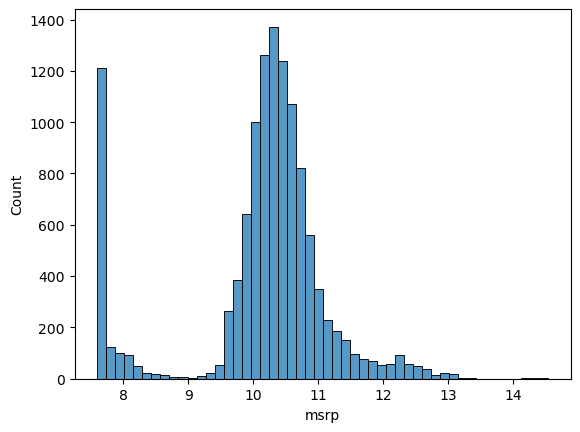

In [126]:
# Visualize the distribution o f log-transformed prices
# This should show a more normal distribution compared to the original skewed prices

sns.histplot(price_logs, bins=50)

## Missing values

In [127]:
# Check for missing values in each column
# Important to identify data quality issues before modeling

df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

## Setting up Validation Frameworks

- Train 60%
- Validate 20%
- Test 20%

In [128]:
# Set up validation framework with 60/20/20 split
n = len(df)  # Total size of the dataset

# Calculate sizes for each split
n_val = int(n * 0.2)    # 20% for validation
n_test = int(n * 0.2)   # 20% for testing
n_train = n - n_val - n_test  # Remaining ~60% for training

In [129]:
# Verify the dataset split sizes. Check that all splits add up to the total dataset size

n, n_val, n_test, n_train

(11914, 2382, 2382, 7150)

In [130]:
# Explore DataFrame iloc functionality for row selection. iloc allows integer-based indexing for selecting specific rows

df.iloc

In [131]:
# Create array of indices for random shuffling. This will be used to randomly select rows for each split

idx = np.arange(n)

In [132]:
# Set random seed for reproducible results and Shuffle the indices to randomize data selection
np.random.seed(5)
np.random.shuffle(idx)
idx

array([3863, 7113,  917, ..., 4079, 2254, 2915])

In [133]:
# Verify random shuffling worked by showing first 10 shuffled rows
df.iloc[idx[:10]]

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
3863,hyundai,elantra,2016,regular_unleaded,173.0,4.0,automatic,front_wheel_drive,4.0,performance,compact,sedan,35,24,1439,21250
7113,mazda,mx-5_miata,2015,premium_unleaded_(recommended),167.0,4.0,manual,rear_wheel_drive,2.0,performance,compact,convertible,28,22,586,23970
917,audi,90,1995,regular_unleaded,172.0,6.0,manual,all_wheel_drive,4.0,luxury,compact,sedan,23,17,3105,2000
3833,hyundai,elantra_coupe,2013,regular_unleaded,145.0,4.0,automatic,front_wheel_drive,2.0,NaN,compact,coupe,37,27,1439,20895
1312,suzuki,aerio,2005,regular_unleaded,155.0,4.0,automatic,front_wheel_drive,4.0,NaN,compact,sedan,28,22,481,14349
487,toyota,4runner,2015,regular_unleaded,270.0,6.0,automatic,four_wheel_drive,4.0,NaN,midsize,4dr_suv,21,17,2031,37825
701,maybach,62,2012,premium_unleaded_(required),620.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,16,10,67,470350
3784,mitsubishi,eclipse,2011,regular_unleaded,162.0,4.0,manual,front_wheel_drive,2.0,hatchback,compact,2dr_hatchback,28,20,436,18999
814,saab,9-3_griffin,2012,flex-fuel_(premium_unleaded_recommended/e85),220.0,4.0,automatic,front_wheel_drive,4.0,"flex_fuel,luxury",midsize,sedan,29,19,376,34340
10281,ford,taurus_x,2009,regular_unleaded,263.0,6.0,automatic,front_wheel_drive,4.0,crossover,large,wagon,24,17,5657,31330


In [134]:
# CORRECT approach: Random split using shuffled indices
# This ensures unbiased data distribution across all splits
df_train = df.iloc[idx[:n_train:]]
df_val = df.iloc[idx[n_train:n_train + n_val]]
df_test = df.iloc[idx[n_train + n_val:]]

In [135]:
# Verify the training set was created correctly
df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
3863,hyundai,elantra,2016,regular_unleaded,173.0,4.0,automatic,front_wheel_drive,4.0,performance,compact,sedan,35,24,1439,21250
7113,mazda,mx-5_miata,2015,premium_unleaded_(recommended),167.0,4.0,manual,rear_wheel_drive,2.0,performance,compact,convertible,28,22,586,23970
917,audi,90,1995,regular_unleaded,172.0,6.0,manual,all_wheel_drive,4.0,luxury,compact,sedan,23,17,3105,2000
3833,hyundai,elantra_coupe,2013,regular_unleaded,145.0,4.0,automatic,front_wheel_drive,2.0,NaN,compact,coupe,37,27,1439,20895
1312,suzuki,aerio,2005,regular_unleaded,155.0,4.0,automatic,front_wheel_drive,4.0,NaN,compact,sedan,28,22,481,14349


In [136]:
# Confirm the sizes of each split are correct
len(df_train), len(df_val), len(df_test)

(7150, 2382, 2382)

In [137]:
# Reset indices after shuffling to have clean 0-based indices. This is important for consistency in further operations

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [138]:
# Verify the training set has clean indices
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,hyundai,elantra,2016,regular_unleaded,173.0,4.0,automatic,front_wheel_drive,4.0,performance,compact,sedan,35,24,1439,21250
1,mazda,mx-5_miata,2015,premium_unleaded_(recommended),167.0,4.0,manual,rear_wheel_drive,2.0,performance,compact,convertible,28,22,586,23970
2,audi,90,1995,regular_unleaded,172.0,6.0,manual,all_wheel_drive,4.0,luxury,compact,sedan,23,17,3105,2000
3,hyundai,elantra_coupe,2013,regular_unleaded,145.0,4.0,automatic,front_wheel_drive,2.0,NaN,compact,coupe,37,27,1439,20895
4,suzuki,aerio,2005,regular_unleaded,155.0,4.0,automatic,front_wheel_drive,4.0,NaN,compact,sedan,28,22,481,14349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,infiniti,m,2012,premium_unleaded_(required),330.0,6.0,automatic,all_wheel_drive,4.0,"luxury,performance",large,sedan,24,17,190,49850
7146,subaru,brz,2017,premium_unleaded_(required),205.0,4.0,manual,rear_wheel_drive,2.0,performance,compact,coupe,29,21,640,29695
7147,cadillac,ats,2015,flex-fuel_(unleaded/e85),321.0,6.0,automatic,rear_wheel_drive,4.0,"flex_fuel,luxury,high-performance",compact,sedan,28,18,1624,47615
7148,volkswagen,jetta_gli,2013,premium_unleaded_(recommended),210.0,4.0,manual,front_wheel_drive,4.0,performance,midsize,sedan,33,22,873,26420


In [139]:
# Extract target variable (MSRP) and apply log transformation
# Log transformation normalizes the skewed price distribution for better model performance
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [140]:
# Remove target variable from feature DataFrames
# Features and target must be separated for machine learning model training
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

In [141]:
# Verify that target arrays have the correct sizes matching feature sets
len(y_train), len(y_val), len(y_test)

(7150, 2382, 2382)

## Linear Regression

In [142]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,hyundai,elantra,2016,regular_unleaded,173.0,4.0,automatic,front_wheel_drive,4.0,performance,compact,sedan,35,24,1439
1,mazda,mx-5_miata,2015,premium_unleaded_(recommended),167.0,4.0,manual,rear_wheel_drive,2.0,performance,compact,convertible,28,22,586
2,audi,90,1995,regular_unleaded,172.0,6.0,manual,all_wheel_drive,4.0,luxury,compact,sedan,23,17,3105
3,hyundai,elantra_coupe,2013,regular_unleaded,145.0,4.0,automatic,front_wheel_drive,2.0,NaN,compact,coupe,37,27,1439
4,suzuki,aerio,2005,regular_unleaded,155.0,4.0,automatic,front_wheel_drive,4.0,NaN,compact,sedan,28,22,481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,infiniti,m,2012,premium_unleaded_(required),330.0,6.0,automatic,all_wheel_drive,4.0,"luxury,performance",large,sedan,24,17,190
7146,subaru,brz,2017,premium_unleaded_(required),205.0,4.0,manual,rear_wheel_drive,2.0,performance,compact,coupe,29,21,640
7147,cadillac,ats,2015,flex-fuel_(unleaded/e85),321.0,6.0,automatic,rear_wheel_drive,4.0,"flex_fuel,luxury,high-performance",compact,sedan,28,18,1624
7148,volkswagen,jetta_gli,2013,premium_unleaded_(recommended),210.0,4.0,manual,front_wheel_drive,4.0,performance,midsize,sedan,33,22,873


In [143]:
df_train.iloc[10]

make                                chevrolet
model                               avalanche
year                                     2012
engine_fuel_type     flex-fuel_(unleaded/e85)
engine_hp                               320.0
engine_cylinders                          8.0
transmission_type                   automatic
driven_wheels                rear_wheel_drive
number_of_doors                           4.0
market_category           crossover,flex_fuel
vehicle_size                            large
vehicle_style                 crew_cab_pickup
highway_mpg                                21
city_mpg                                   15
popularity                               1385
Name: 10, dtype: object

In [144]:
# Take horse power, city_mpg, popularity  

xi = [453, 11, 86]
w0 = 7.17
w = [0.01, 0.04, 0.002]

In [145]:
# Implement Linear Regression

def linear_regression(xi):
    n = len(xi)

    pred = w0

    for j in range(n):
        pred = pred + w[j] * xi[j]

    return pred

In [146]:
linear_regression(xi)

12.312

In [147]:
np.expm1(12.312) - 1

222346.2221101062

In [148]:
np.log1p(222346.2221101062)

12.311995502539938

## Training Linear Regression: Vector Form

In [149]:
def dot(xi, w):
    n = len(xi)

    res = 0

    for j in range(n):
        res = res + xi[j] * w[j]

    return res  

In [150]:
def linear_regression(xi):

    return w0 + dot(xi, w)

In [151]:
# w_new includes bias as the first weight
w_new = [w0] + w  

In [152]:
w_new

[7.17, 0.01, 0.04, 0.002]

In [153]:
def linear_regression(xi):
    xi = [1] + xi  # prepend 1 to xi for the bias term
    return dot(xi, w_new)

In [154]:
linear_regression(xi)

12.312

In [155]:
xi = [453, 11, 86]
w0 = 7.17
w = [0.01, 0.04, 0.002]

In [156]:
# Create sample feature vectors with bias term (1) prepended
# Each vector represents: [bias, horsepower, city_mpg, popularity]
x1 = [1, 148, 24, 1385]
x2 = [1, 132, 25, 2031]
x10 = [1, 453, 11, 86]

# Create matrix X containing all feature vectors
X = [x1, x2, x10]

# Display the matrix to verify it was created correctly
X = np.array(X)
X   

array([[   1,  148,   24, 1385],
       [   1,  132,   25, 2031],
       [   1,  453,   11,   86]])

In [157]:
def linear_regression(xi):
    return X.dot(w_new)

In [158]:
linear_regression(X)

array([12.38 , 13.552, 12.312])

## Training Linear Regression: Normal Equation

In [159]:
def train_linear_regression(X, y):
    pass 


In [160]:
X= [
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 86],
    [38, 54, 185],
    [142, 25, 431],
    [453, 31, 86],
]

X = np.array(X) 
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [161]:
ones  = np.ones(X.shape[0])
ones

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [162]:
X = np.column_stack([ones, X])



In [163]:
y=[10000, 2000, 15000, 20050, 10000, 20000, 150, 25000, 12000]

In [164]:
XTX = X.T.dot(X)
XTX

array([[9.000000e+00, 2.109000e+03, 2.300000e+02, 4.676000e+03],
       [2.109000e+03, 6.964710e+05, 4.411500e+04, 7.185400e+05],
       [2.300000e+02, 4.411500e+04, 7.146000e+03, 1.188030e+05],
       [4.676000e+03, 7.185400e+05, 1.188030e+05, 6.359986e+06]])

In [165]:
XTX_inv = np.linalg.inv(XTX)
XTX_inv

array([[ 3.30686958e+00, -5.39612291e-03, -6.21325581e-02,
        -6.61016816e-04],
       [-5.39612291e-03,  1.11633857e-05,  8.66973393e-05,
         1.08664195e-06],
       [-6.21325581e-02,  8.66973393e-05,  1.46189255e-03,
         8.57849603e-06],
       [-6.61016816e-04,  1.08664195e-06,  8.57849603e-06,
         3.60215866e-07]])

In [166]:
XTX.dot(XTX_inv).round(1)

array([[ 1., -0., -0.,  0.],
       [ 0.,  1., -0.,  0.],
       [ 0., -0.,  1.,  0.],
       [ 0., -0., -0.,  1.]])

In [167]:
w_full = XTX_inv.dot(X.T).dot(y)
w_full

array([ 3.68454893e+04, -2.28972625e+01, -5.80657419e+02, -7.60647358e+00])

In [168]:
w0 = w_full[0]
w = w_full[1:]

In [169]:
w0, w

(36845.48928383876, array([ -22.89726251, -580.65741934,   -7.60647358]))

In [170]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:] 


In [171]:
train_linear_regression(X, y)   

(7.240752195131955e+20,
 array([-7.24075220e+20,  1.14689251e+02,  1.35495427e+01, -2.29334831e+00]))

## Car Price Baseline Model

In [172]:
# Display column names of the train dataset
df_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [173]:
# Check the datatypes

df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [174]:
# Select numerical columns as features
base = ['engine_hp', 'engine_cylinders', 'highway_mpg',
        'city_mpg', 'popularity']

# Create feature matrix by selecting numerical columns and filling missing values with 0
X_train = df_train[base].fillna(0).values

# Train the linear regression model
w0, w = train_linear_regression(X_train, y_train)

# Generate predictions on the training set
y_pred = w0 + X_train.dot(w)


In [175]:
# Get the intercept (w0) and coefficients (w)
w0

7.937391668446853

In [176]:
# Get the intercept (w0) and coefficients (w)
w

array([ 9.45603074e-03, -1.45172387e-01,  1.58001781e-02,  1.25212560e-02,
       -1.09113412e-05])

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

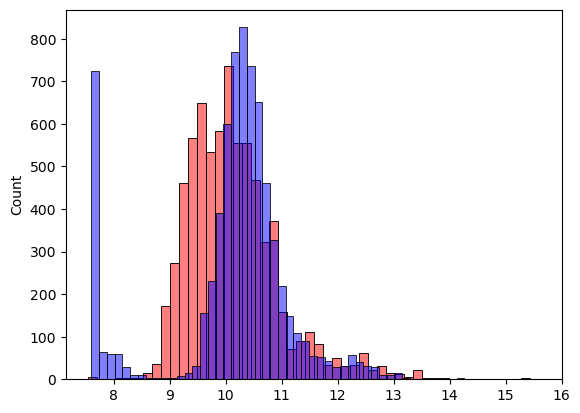

In [177]:
# Visualize the distribution of predicted vs actual prices on training set

sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

## Root Mean Squared Error (RMSE)

In [178]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [179]:
rmse(y_train, y_pred)

0.7494783449748382

## Validate the Model

In [180]:
# Prepare the validation set as we did for training set

base = ['engine_hp', 'engine_cylinders', 'highway_mpg',
        'city_mpg', 'popularity']

X_train = df_train[base].fillna(0).values

w0, w = train_linear_regression(X_train, y_train)

y_pred = w0 + X_train.dot(w)

In [181]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [182]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

0.7580590021748551

## Simple Feature Engineering

In [183]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,hyundai,elantra,2016,regular_unleaded,173.0,4.0,automatic,front_wheel_drive,4.0,performance,compact,sedan,35,24,1439
1,mazda,mx-5_miata,2015,premium_unleaded_(recommended),167.0,4.0,manual,rear_wheel_drive,2.0,performance,compact,convertible,28,22,586
2,audi,90,1995,regular_unleaded,172.0,6.0,manual,all_wheel_drive,4.0,luxury,compact,sedan,23,17,3105
3,hyundai,elantra_coupe,2013,regular_unleaded,145.0,4.0,automatic,front_wheel_drive,2.0,NaN,compact,coupe,37,27,1439
4,suzuki,aerio,2005,regular_unleaded,155.0,4.0,automatic,front_wheel_drive,4.0,NaN,compact,sedan,28,22,481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,infiniti,m,2012,premium_unleaded_(required),330.0,6.0,automatic,all_wheel_drive,4.0,"luxury,performance",large,sedan,24,17,190
7146,subaru,brz,2017,premium_unleaded_(required),205.0,4.0,manual,rear_wheel_drive,2.0,performance,compact,coupe,29,21,640
7147,cadillac,ats,2015,flex-fuel_(unleaded/e85),321.0,6.0,automatic,rear_wheel_drive,4.0,"flex_fuel,luxury,high-performance",compact,sedan,28,18,1624
7148,volkswagen,jetta_gli,2013,premium_unleaded_(recommended),210.0,4.0,manual,front_wheel_drive,4.0,performance,midsize,sedan,33,22,873


In [184]:
# Compute the age for car using the year column
2017 - df_train.year

0        1
1        2
2       22
3        4
4       12
        ..
7145     5
7146     0
7147     2
7148     4
7149     3
Name: year, Length: 7150, dtype: int64

In [185]:
def prepare_X(df):
    df = df.copy()
    
    df['age'] = 2017 - df['year']
    features = base + ['age']
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values

    return X

In [186]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

0.503494145207369

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


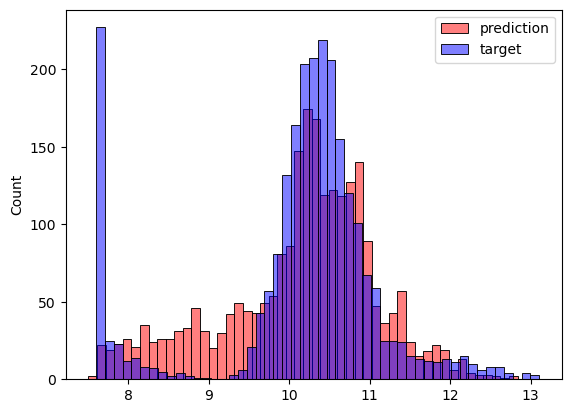

In [187]:
sns.histplot(y_pred, label='prediction', color='red', alpha=0.5, bins=50)
sns.histplot(y_val, label='target', color='blue',  alpha=0.5, bins=50)
plt.legend()

In [189]:
df_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [190]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,hyundai,elantra,2016,regular_unleaded,173.0,4.0,automatic,front_wheel_drive,4.0,performance,compact,sedan,35,24,1439
1,mazda,mx-5_miata,2015,premium_unleaded_(recommended),167.0,4.0,manual,rear_wheel_drive,2.0,performance,compact,convertible,28,22,586
2,audi,90,1995,regular_unleaded,172.0,6.0,manual,all_wheel_drive,4.0,luxury,compact,sedan,23,17,3105
3,hyundai,elantra_coupe,2013,regular_unleaded,145.0,4.0,automatic,front_wheel_drive,2.0,NaN,compact,coupe,37,27,1439
4,suzuki,aerio,2005,regular_unleaded,155.0,4.0,automatic,front_wheel_drive,4.0,NaN,compact,sedan,28,22,481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,infiniti,m,2012,premium_unleaded_(required),330.0,6.0,automatic,all_wheel_drive,4.0,"luxury,performance",large,sedan,24,17,190
7146,subaru,brz,2017,premium_unleaded_(required),205.0,4.0,manual,rear_wheel_drive,2.0,performance,compact,coupe,29,21,640
7147,cadillac,ats,2015,flex-fuel_(unleaded/e85),321.0,6.0,automatic,rear_wheel_drive,4.0,"flex_fuel,luxury,high-performance",compact,sedan,28,18,1624
7148,volkswagen,jetta_gli,2013,premium_unleaded_(recommended),210.0,4.0,manual,front_wheel_drive,4.0,performance,midsize,sedan,33,22,873


In [192]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object